<a href="https://colab.research.google.com/github/SundharessB/machine-learing/blob/main/2348564_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/customer_support_tickets.csv")
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [3]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [5]:
bin_edges = [18, 26, 36, 46, 56, 66, 76, 86, 96, 106]  # Bin edges based on your desired ranges
bin_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96+']

df['age_group'] = pd.cut(df['Customer Age'], bins=bin_edges, labels=bin_labels)

print(df.head())


   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

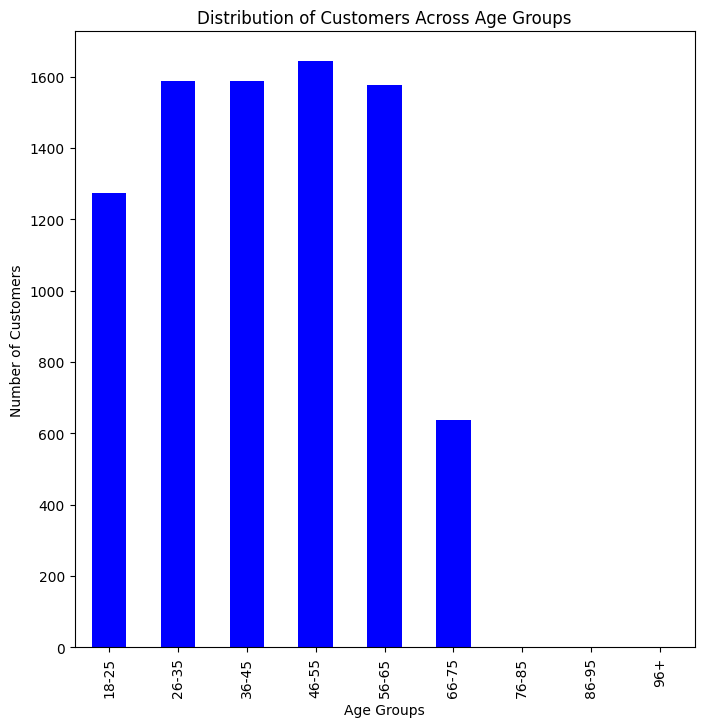

In [6]:
age_group_counts = df['age_group'].value_counts()
plt.figure(figsize=(8, 8))
age_group_counts.sort_index().plot(kind='bar', color='blue')
plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')

plt.show()


In [7]:
df.dtypes

Ticket ID                          int64
Customer Name                     object
Customer Email                    object
Customer Age                       int64
Customer Gender                   object
Product Purchased                 object
Date of Purchase                  object
Ticket Type                       object
Ticket Subject                    object
Ticket Description                object
Ticket Status                     object
Resolution                        object
Ticket Priority                   object
Ticket Channel                    object
First Response Time               object
Time to Resolution                object
Customer Satisfaction Rating     float64
age_group                       category
dtype: object

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/customer_support_tickets.csv')  # Replace with your actual file path

# Specify the categorical columns for one-hot encoding
categorical_columns = ['Customer Gender', 'Ticket Priority']

# Create a ColumnTransformer for one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Apply the transformation using fit_transform
encoded_data = ct.fit_transform(df)

# Convert the transformed data into a DataFrame
encoded_df = pd.DataFrame(encoded_data)

# Display the first few rows of the transformed DataFrame
print(encoded_df.head())


    0    1    2    3    4    5    6  7                    8   \
0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1        Marisa Obrien   
1  1.0  0.0  0.0  1.0  0.0  0.0  0.0  2         Jessica Rios   
2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  3  Christopher Robbins   
3  1.0  0.0  0.0  0.0  0.0  1.0  0.0  4     Christina Dillon   
4  1.0  0.0  0.0  0.0  0.0  1.0  0.0  5    Alexander Carroll   

                           9   ...          12               13  \
0  carrollallison@example.com  ...  2021-03-22  Technical issue   
1    clarkeashley@example.com  ...  2021-05-22  Technical issue   
2   gonzalestracy@example.com  ...  2020-07-14  Technical issue   
3    bradleyolson@example.org  ...  2020-11-13  Billing inquiry   
4     bradleymark@example.com  ...  2020-02-04  Billing inquiry   

                         14  \
0             Product setup   
1  Peripheral compatibility   
2           Network problem   
3            Account access   
4                 Data loss   

                         

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/customer_support_tickets.csv')  # Replace with your actual file path

# Specify the categorical columns for label encoding
categorical_columns = ['Customer Gender', 'Ticket Priority']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the DataFrame with encoded values
print(df.head())


   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

   Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0                2        GoPro Hero       2021-03-22  Technical issue   
1                0       LG Smart TV       2021-05-22  Technical issue   
2                2          Dell XPS       2020-07-14  Technical issue   
3                0  Microsoft Office       2020-11-13  Billing inquiry   
4                0  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral comp

In [10]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,2,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,0,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,0,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,0,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,2,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,2,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,0,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,2,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,0,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,2,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,0,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,2,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,0,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,0,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,0,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,1,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,1,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,3,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['Customer Satisfaction Rating']] = imputer.fit_transform(df[['Customer Satisfaction Rating']])
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating       0
dtype: int64

In [12]:
df['age_group'] = pd.cut(df['Customer Age'], bins=bin_edges, labels=bin_labels)
covariance_matrix = df[['age_group', 'Customer Satisfaction Rating']].cov()
covariance_matrix

<ipython-input-12-27e4927eb8bd>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df[['age_group', 'Customer Satisfaction Rating']].cov()


,Customer Satisfaction Rating
Customer Satisfaction Rating,0.647118


In [13]:
#selected_columns = ['Customer Satisfaction Rating', 'age_group']
#selected_data = df[selected_columns]
encoded_age_group = pd.get_dummies(df['age_group'], prefix='age_group')

# Select the columns for covariance calculation
selected_columns = ['Customer Satisfaction Rating']
selected_data = pd.concat([df[selected_columns], encoded_age_group], axis=1)

covariance_matrix = np.cov(selected_data, rowvar=False)
print("Covariance Matrix between age_group and Customer Satisfaction Rating is:")
print(covariance_matrix)



Covariance Matrix between age_group and Customer Satisfaction Rating is:
[[ 6.47117617e-01 -6.77971393e-04  1.25102930e-03  3.01178460e-04
  -3.80759174e-04 -2.18079305e-03  1.51292918e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.77971393e-04  1.27816595e-01 -2.81924859e-02 -2.81924859e-02
  -2.92050705e-02 -2.80148395e-02 -1.13160766e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.25102930e-03 -2.81924859e-02  1.52292534e-01 -3.51188973e-02
  -3.63802566e-02 -3.48976062e-02 -1.40962430e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.01178460e-04 -2.81924859e-02 -3.51188973e-02  1.52292534e-01
  -3.63802566e-02 -3.48976062e-02 -1.40962430e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.80759174e-04 -2.92050705e-02 -3.63802566e-02 -3.63802566e-02
   1.56455735e-01 -3.61510174e-02 -1.46025353e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.18079305e-03 -2.80148395e-02 -3.48976062e-02 -3.48976062e-02
  -3.61510174e-02  1.51552

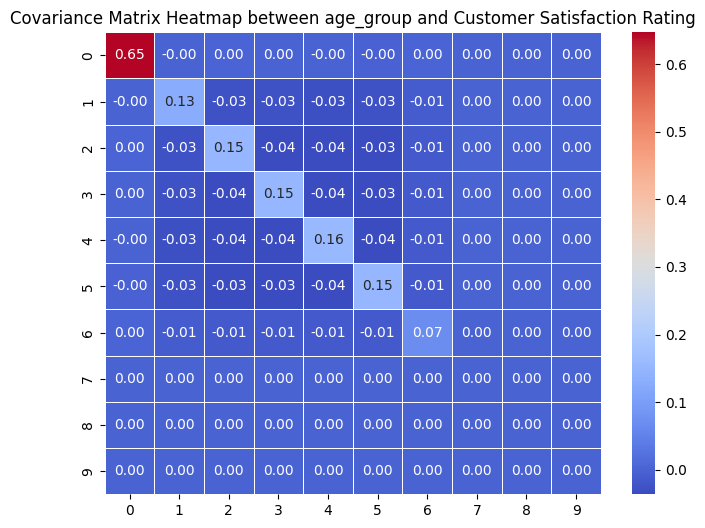

In [14]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Covariance Matrix Heatmap between age_group and Customer Satisfaction Rating')
plt.show()

In [17]:
import scipy.stats as stats
df = pd.read_csv("/content/customer_support_tickets.csv")

categorical_columns = ['Customer Gender', 'Ticket Priority']

contingency_table = pd.crosstab(df[categorical_columns[0]], df[categorical_columns[1]])

chi2, *_, p_value = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 4.591756328277643
P-value: [[725.75546109 710.75628764 703.25670091 747.23155036]
 [728.01794781 712.97201559 705.44904947 749.56098713]
 [675.2265911  661.27169678 654.29424962 695.20746251]]
